# Shopping Mall Customers Clustering / 쇼핑몰 고객 군집화

**Project Overview / 프로젝트 개요:**
<br> The project is based on open-source data available at https://absentdata.com/wp-content/uploads/2023/03/Mall_Customers.csv
<br> 이 프로젝트는 공개적으로 이용 가능한 오픈소스 데이터를 기반으로 합니다
<br>
<br> The data describes shopping mall customers with spending, income, and other dimensions.
<br> 해당 데이터는 지출, 소득 및 기타 여러 차원에 걸쳐 쇼핑몰 고객에 대한 정보를 설명합니다

**Project Objective / 프로젝트 목표:**
* Understanding the target customers to help marketing team plan customer targeting strategy
<br> 마케팅 팀의 고객 타겟 전략을 수립하는데 있어 도움을 주기 위해 해당 고객을 이해하는 것을 목표로 함.
<br> Dividing mall target customers into approachable groups using K-means Clustering Algorythm
<br> K-means 클러스터링 알고리즘을 사용하여 쇼핑몰의 타깃 고객을 접근 가능한 그룹으로 분류

* Udentifying the most important shopping groups based on available attributes (income, age, the mall shopping score)
<br>가용한 속성(소득, 연령, 쇼핑 점수)을 기반으로 가장 중요한 쇼핑 그룹을 식별
<br> Creating subsets of market based on demographic behavioral criteria to better understand the target for marketing activities using summary statistics on the clusters
<br> 클러스터에 대한 요약 통계를 활용하여 인구통계학적·행동적 기준에 따른 시장 하위 집합을 생성함으로써, 마케팅 활동을 위한 타깃을 더 잘 이해하기 위함

In [1]:
#importing necessary libraies / 필요한 라이브러리 불러오기
import pandas as pd
from scipy.stats import shapiro

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from IPython.display import Image

import warnings
warnings.filterwarnings('ignore')

In [2]:
#formatting number to 2 decimal points / 숫자를 소수점 둘째 자리까지 포맷하기
pd.options.display.float_format = '{:,.2f}'.format

## Data Overview and Prepocessing / 데이터 개요 및 전처리

In [3]:
#reading the data / 데이터 불러오기
df = pd.read_csv('https://absentdata.com/wp-content/uploads/2023/03/Mall_Customers.csv')

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
#formatting and changing column names / 열 이름을 포맷하고 변경하기

df.columns = df.columns.str.lower().str.replace(' ', '_')
df = df.rename(columns={'customerid': 'customer_id'})
df.columns

Index(['customer_id', 'gender', 'age', 'annual_income_(k$)',
       'spending_score_(1-100)'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   customer_id             200 non-null    int64 
 1   gender                  200 non-null    object
 2   age                     200 non-null    int64 
 3   annual_income_(k$)      200 non-null    int64 
 4   spending_score_(1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.isna().sum()

customer_id               0
gender                    0
age                       0
annual_income_(k$)        0
spending_score_(1-100)    0
dtype: int64

In [7]:
#cheching for duplicates / 중복 데이터 확인하기
df.duplicated().sum()

0

In [8]:
#dropping the unnecessary column / 불필요한 열 삭제하기
df = df.drop('customer_id', axis=1)

The initial data consists of 200 rows and the following columns: *customer_id', 'gender', 'age', 'annual_income_(k$)', 'spending_score_(1-100)'*. For convenience, the names of the columns were formatted.  4 of the 5 columns are numeric type, one (*gender*) is object type. The dataset contains no missing values.

The *customer_id* column was dropped as it does not add any value to the dataset.
The dataset for analysis now consisnt of 200 rows and 4 coulmns.

초기 데이터는 200개의 행과 다음 열로 구성되어 있습니다: customer_id, gender, age, annual_income_(k$), spending_score_(1-100). 편의를 위해 열 이름이 포맷되었습니다. 5개의 열 중 4개는 숫자형이고, 하나(gender)는 문자열(object)형입니다. 데이터셋에는 결측값이 없습니다.

customer_id 열은 분석에 의미가 없으므로 삭제되었습니다.
현재 분석용 데이터셋은 200개의 행과 4개의 열로 구성되어 있습니다.

## Exploratory Data Analysis / 탐색적 데이터 분석

### Univariate Analysis / 단변량 분석

In [9]:
#checking the numeric type columns / 숫자형 열 확인하기
df.describe()

,age,annual_income_(k$),spending_score_(1-100)
count,200.00,200.00,200.00
mean,38.85,60.56,50.20
std,13.97,26.26,25.82
min,18.00,15.00,1.00
25%,28.75,41.50,34.75
50%,36.00,61.50,50.00
75%,49.00,78.00,73.00
max,70.00,137.00,99.00


First impression on the data is that there are no outliers which belong to bad data.

잘못된 데이터에 해당하는 이상치(outlier)가 없다는 것입니다

In [10]:
#checking the object type column / 문자열(object)형 열 확인하기
df['gender'].value_counts()

gender
Female    112
Male       88
Name: count, dtype: int64

In [11]:
df['gender'].value_counts(normalize=True)

gender
Female   0.56
Male     0.44
Name: proportion, dtype: float64

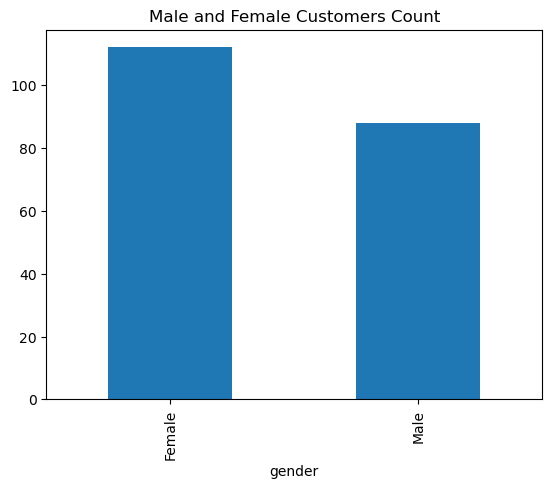

In [12]:
plt.title('Male and Female Customers Count')
df['gender'].value_counts().plot.bar();

There are more female customers in the dataset.

데이터셋에는 여성 고객이 더 많습니다.

In [13]:
#cheching the numerical data distribution / 숫자형 데이터 분포 확인하기
shapiro(df['annual_income_(k$)'])

ShapiroResult(statistic=0.9783905148506165, pvalue=0.003537340322509408)

In [14]:
shapiro(df['age'])

ShapiroResult(statistic=0.9516184329986572, pvalue=2.7109526854474097e-06)

In [15]:
shapiro(df['spending_score_(1-100)'])

ShapiroResult(statistic=0.9694603085517883, pvalue=0.00024227304675150663)

As the p-value is smaller than the threshold (0.05) we can reject the null hypothesis and consider the data not normally distributed.

p-값이 기준치(0.05)보다 작기 때문에, 귀무가설을 기각할 수 있으며 데이터가 정규분포를 따르지 않는다고 볼 수 있습니다.

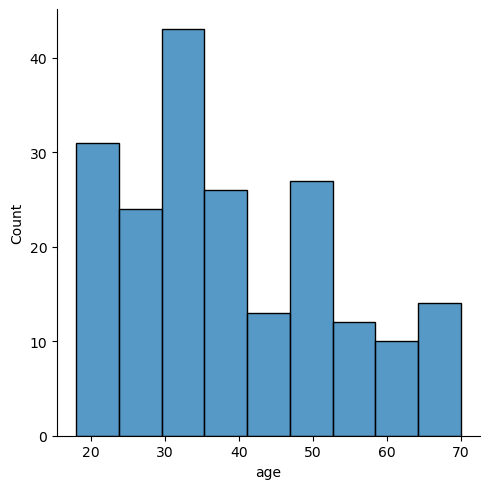

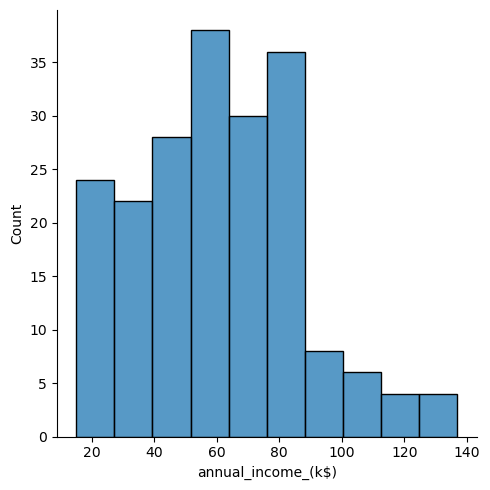

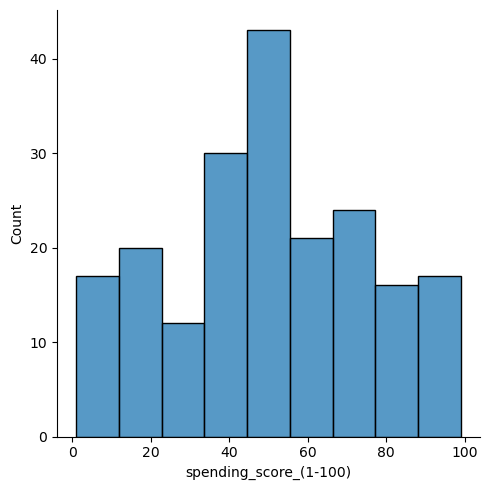

In [16]:
columns = ['age', 'annual_income_(k$)','spending_score_(1-100)']
for i in columns:
    sns.displot(df, x=i)

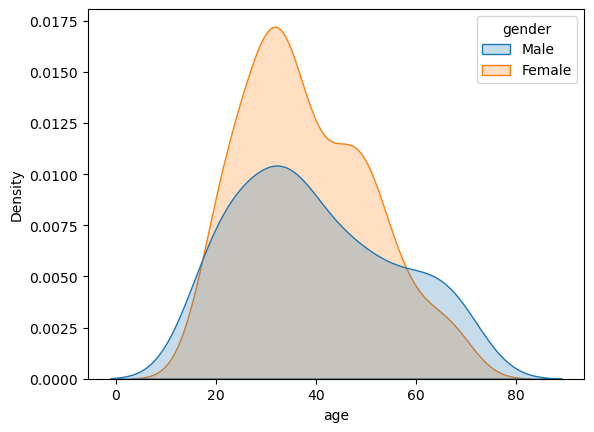

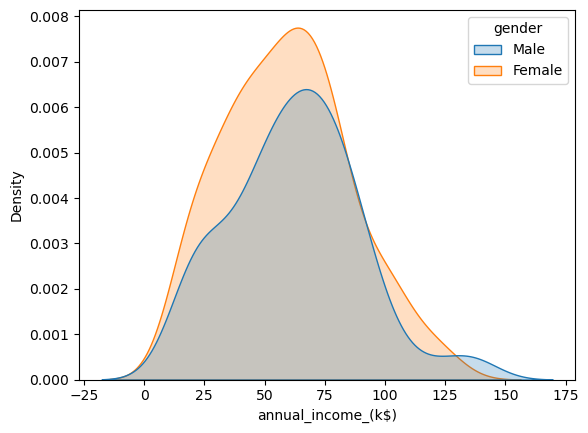

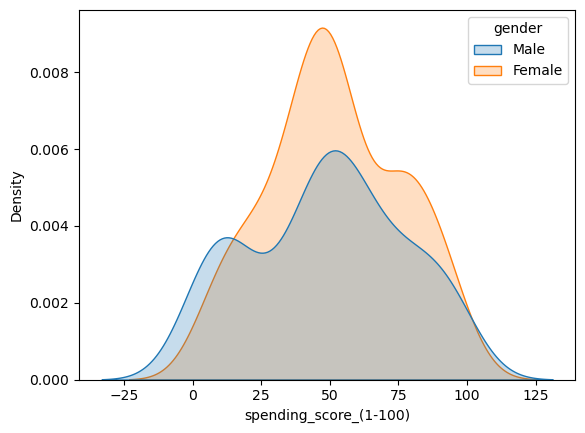

In [17]:
for i in columns:
    plt.figure()
    sns.kdeplot(df, shade=True, x=i, hue=df['gender'])

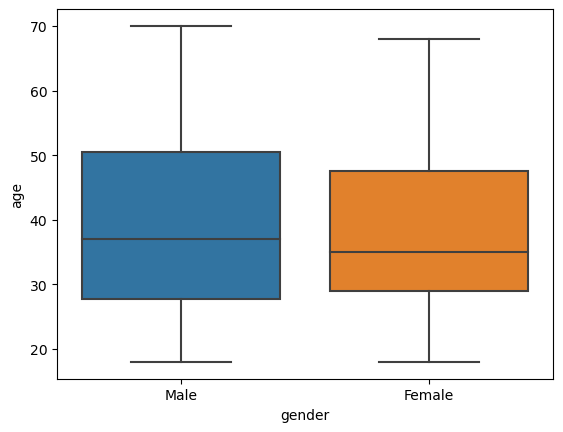

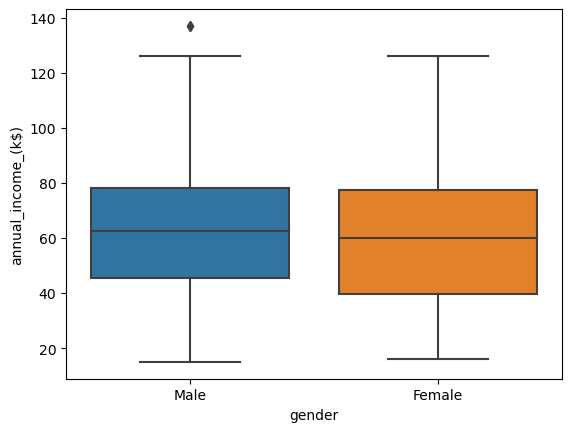

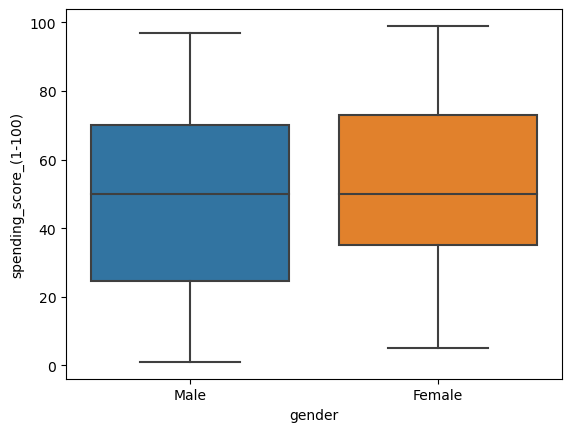

In [18]:
for i in columns:
    plt.figure()
    sns.boxplot(data=df, x='gender', y=df[i])

There is one outlier in the *average income* column, however it does not seem like bad data, so there is no need to remove it.

average income 열에 하나의 이상치가 있지만, 잘못된 데이터로 보이지 않으므로 제거할 필요는 없습니다.

### Bivariate Analysis / 이변량 분석

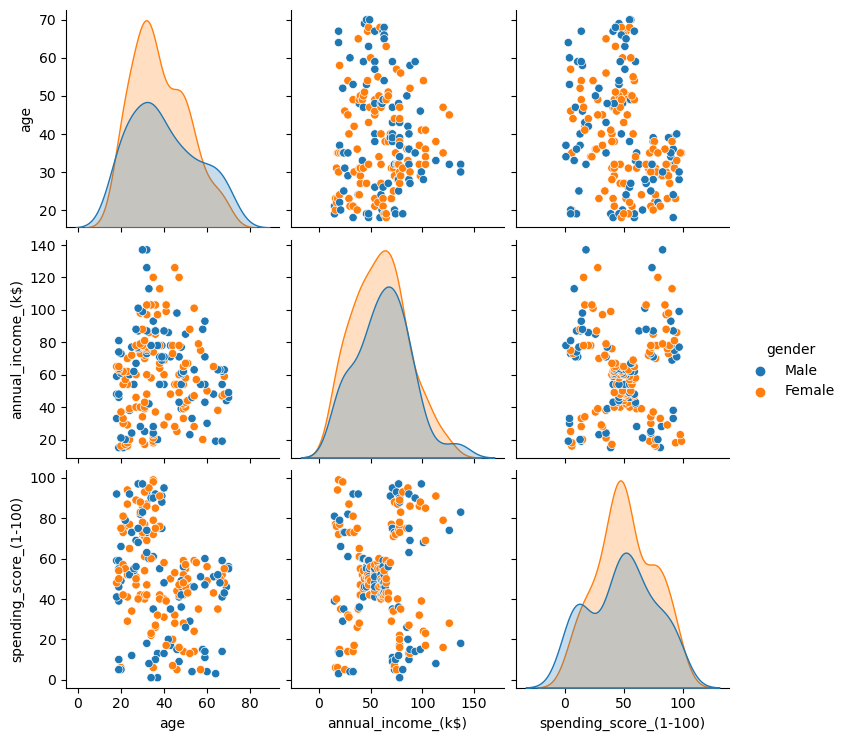

In [19]:
sns.pairplot(df, hue='gender');

It looks like clustering would be visually representative and easy to perform on the pair of *annual income* and *spending score* columns

annual income와 spending score 열 쌍을 사용하면 군집화가 시각적으로 잘 나타나고 수행하기도 쉬워 보입니다.

In [20]:
df.groupby(['gender'])[columns].mean()

,age,annual_income_(k$),spending_score_(1-100)
gender,,,
Female,38.10,59.25,51.53
Male,39.81,62.23,48.51


In [21]:
df.groupby(['gender'])[columns].median()

,age,annual_income_(k$),spending_score_(1-100)
gender,,,
Female,35.00,60.00,50.00
Male,37.00,62.50,50.00


The average and median income of female  customer is lower, than male customers'.
<br>The average and median age of female customers is also lower than the male's. However they both are in 30s group.
<br>The average spending score of male customers is a little lower than tat of females, however the median score is the same.

여성 고객의 평균 및 중앙 소득은 남성 고객보다 낮습니다.
<br>여성 고객의 평균 및 중앙 연령도 남성보다 낮지만, 두 그룹 모두 30대에 속합니다.
<br>남성 고객의 평균 소비 점수는 여성보다 약간 낮지만, 중앙값은 동일합니다.

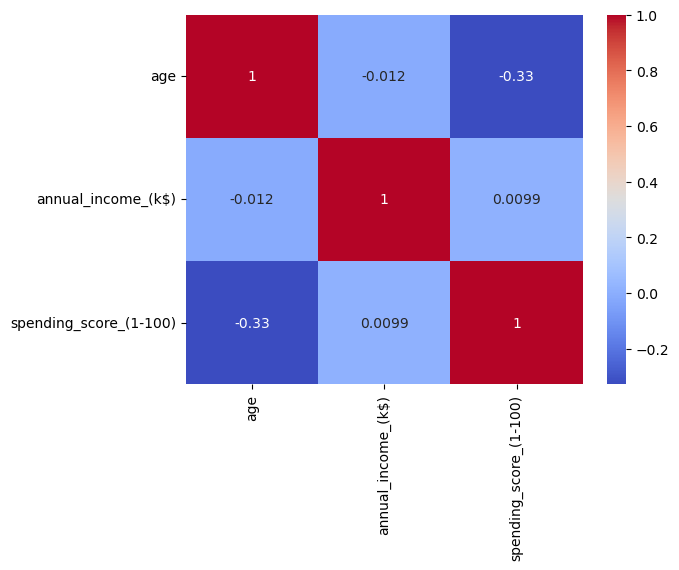

In [22]:
sns.heatmap(df[columns].corr(), annot=True, cmap='coolwarm');

There is a weak negative correlation between age and spending score, the older the customers - the less they tend to spend and vise versa.

연령과 소비 점수 사이에는 약한 음의 상관관계가 있습니다. 즉, 나이가 많을수록 소비 경향이 낮아지고, 반대로 나이가 적을수록 소비 경향이 높습니다.

## Customer Segmentation / 고객 세분화

### Univariate Clustering / 단변량 군집화

Let us find the number of clusters for *annual income* column using the Elbow method.

Elbow 방법을 사용하여 annual income 열의 군집 수를 찾아보겠습니다.

In [23]:
#Elbow Method Graph

def elbow_graph(title, columns, data=df):
    intertia_scores=[]
    
    for i in range(1,11):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(data[columns])
        intertia_scores.append(kmeans.inertia_)
    
    plt.title(title)
    plt.plot(range(1,11), intertia_scores)

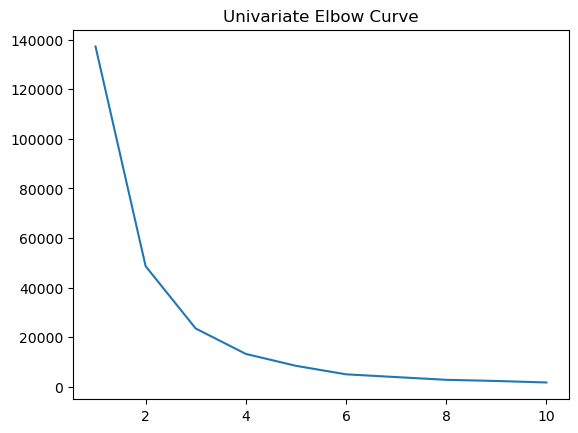

In [24]:
elbow_graph('Univariate Elbow Curve', ['annual_income_(k$)'])

It looks like the optimal number of clusters should be 3, as the graph smoothes afterwards.

그래프가 그 이후로 완만해지는 것을 보면, 최적의 군집 수는 3개로 보입니다.

In [25]:
uni_cluster = KMeans(n_clusters=3)
uni_cluster.fit(df[['annual_income_(k$)']])
df['uni_cluster'] = uni_cluster.labels_

In [26]:
#show the clustering data / 군집화된 데이터 확인하기

def cluster_check(column):
    print('Data Sample')
    display(df.head())
    print()
    print('Cluster Counts')
    display(pd.DataFrame({'count': df[column].value_counts(), 'proportion': df[column].value_counts(normalize=True)}))
    print()
    print('Cluster Means')
    display(df.groupby(column)[columns].mean())
    print()
    print('Cluster Gender')
    display(pd.crosstab(df[column],df['gender'],normalize='index'))

In [27]:
cluster_check('uni_cluster')

Data Sample


,gender,age,annual_income_(k$),spending_score_(1-100),uni_cluster
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,1



Cluster Counts


,count,proportion
uni_cluster,,
0,90,0.45
1,74,0.37
2,36,0.18



Cluster Means


,age,annual_income_(k$),spending_score_(1-100)
uni_cluster,,,
0,38.72,67.09,50.00
1,39.50,33.49,50.23
2,37.83,99.89,50.64



Cluster Gender


gender,Female,Male
uni_cluster,,
0,0.54,0.46
1,0.61,0.39
2,0.50,0.50


The univariate clustering on *annual income* column does not fully explain the data.

연간 소득 컬럼에 대한 단일 변수 클러스터링만으로는 데이터를 충분히 설명할 수 없습니다

### Bivariate Clustering / 이변량 군집화

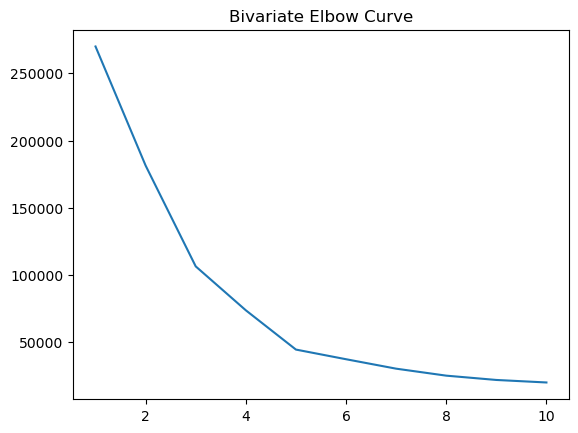

In [28]:
elbow_graph('Bivariate Elbow Curve', ['annual_income_(k$)', 'spending_score_(1-100)'])

In [29]:
bi_cluster = KMeans(n_clusters=5)
bi_cluster.fit(df[['annual_income_(k$)', 'spending_score_(1-100)']])
df['bi_cluster'] = bi_cluster.labels_

In [30]:
cluster_check('bi_cluster')

Data Sample


,gender,age,annual_income_(k$),spending_score_(1-100),uni_cluster,bi_cluster
0,Male,19,15,39,1,4
1,Male,21,15,81,1,0
2,Female,20,16,6,1,4
3,Female,23,16,77,1,0
4,Female,31,17,40,1,4



Cluster Counts


,count,proportion
bi_cluster,,
1,81,0.41
2,39,0.20
3,35,0.17
4,23,0.12
0,22,0.11



Cluster Means


,age,annual_income_(k$),spending_score_(1-100)
bi_cluster,,,
0,25.27,25.73,79.36
1,42.72,55.30,49.52
2,32.69,86.54,82.13
3,41.11,88.20,17.11
4,45.22,26.30,20.91



Cluster Gender


gender,Female,Male
bi_cluster,,
0,0.59,0.41
1,0.59,0.41
2,0.54,0.46
3,0.46,0.54
4,0.61,0.39


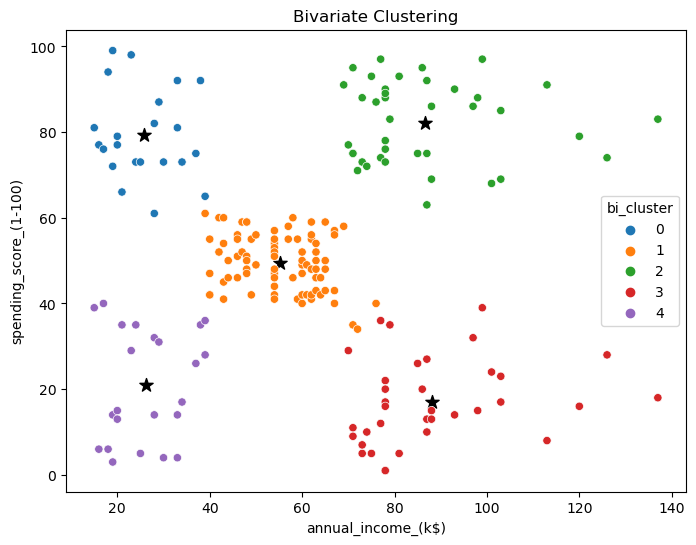

In [31]:
centers = pd.DataFrame(bi_cluster.cluster_centers_)
centers.columns = ['x','y']

plt.figure(figsize=(8,6))
plt.title('Bivariate Clustering')
plt.scatter(x=centers['x'], y=centers['y'], s=100, c='black', marker='*')
sns.scatterplot(data=df, x='annual_income_(k$)', y='spending_score_(1-100)',
                hue='bi_cluster', palette='tab10')

#plt.savefig('clustering_bivaraiate.png')
plt.show()

There are 5 obvious groups on the graph based in *shopping score* and *annual income*. This is the best representation so far.

쇼핑 점수와 연간 소득을 기준으로 하면 그래프에서 5개의 명확한 그룹이 관찰됩니다

### Multivariate Clustering / 다변량 군집화

In [32]:
#preprocessing the data with OHE / 원-핫 인코딩(OHE)을 이용한 데이터 전처리
df_scaled = pd.get_dummies(df, drop_first=True).drop(['uni_cluster', 'bi_cluster'], axis=1)
df_scaled.head()

,age,annual_income_(k$),spending_score_(1-100),gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False


In [33]:
#scaling the data to ensure the algorythm works correctly / 알고리즘의 올바른 동작을 위해 데이터 스케일링 수행
scale = StandardScaler()

df_scaled = scale.fit_transform(df_scaled)
df_scaled = pd.DataFrame(scale.fit_transform(df_scaled))
df_scaled.head()

,0,1,2,3
0,-1.42,-1.74,-0.43,1.13
1,-1.28,-1.74,1.20,1.13
2,-1.35,-1.70,-1.72,-0.89
3,-1.14,-1.70,1.04,-0.89
4,-0.56,-1.66,-0.40,-0.89


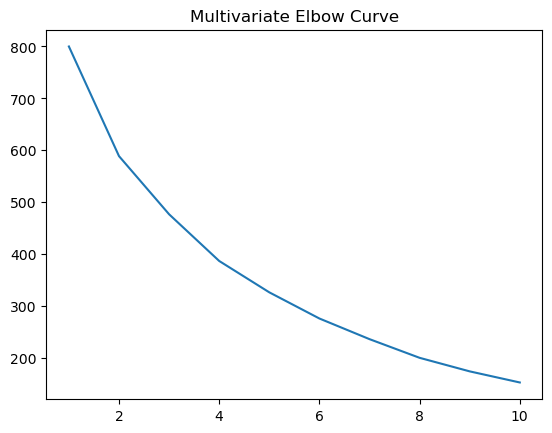

In [34]:
elbow_graph('Multivariate Elbow Curve', df_scaled.columns, df_scaled)

The bivariate clustering will suffice as there is no obvious elbow with multivariate approach.

다변량 방법에서는 명확한 엘보우가 관찰되지 않으므로, 이변량 클러스터링만으로도 충분합니다

## Summary and Conslusions / 요약 및 결론

Assuming the dataset is representative of shopping mall customers general population, below are the findings and recommendations.

본 데이터셋이 쇼핑몰 고객 전체에 대한 대표값이라 가정할 경우 주요 결과와 제안사항은 아래와 같습니다.

| General Trends | Recommendations |
|:----------|:----------|
|There are more female shopping mall customers than male ones| <ul><li>Developing strategies to grow the male customers number: special workshops, male-oriented stores, enhancing purchase effectiveness and speed, social events for male community, rest spaces</li><li>Encouraging women to spend more with emotionally engaging marketing campaigns, feeling of comfort and safety, and personalization (social-role approach, celebrating being a woman)</li></ul>|
|Annual income of female customers is lower than that of male customers|<ul><li>Male customers: <br> Creating a habbit of spending money in the shopping mall <br> Opening pop-up stores targeting males <br> Providing premium experience opportunities </li><li>Female customers (more potential price sensitivity): <br> Providing a variety of purchse options in various price segments <br> Educating the customers on installment payment options and expanding the benefits </li></ul>|
|The older the customer the less they are willing to spend and vice versa|Older Customers: <br> The importance of comfort: ensuring there are enough places to rest <br> Redusing stress: easy-to-understand navigation and help desks, voice-navigation stations <br> Sense of community: providing programs and activities accessible for people of older age <br> Health concearns: Encouraging self-care with special discounts, promotions and health check-up booths <br> Accessibility: rental wheelchairs and guides|

|일반적인 경향	|권장 사항|
|:----------|:----------|
|여성 고객이 남성보다 많음| <ul><li>남성 고객 증가 전략: 워크숍, 남성 전용 매장, 소셜 이벤트, 휴식 공간 </li><li> 여성 고객 소비 촉진: 감성 마케팅, 편안함·안전감, 개인화 전략 </li></ul>|
|여성 고객 소득이 남성보다 낮음|	<ul><li> 남성: 소비 습관 형성, 팝업 스토어, 프리미엄 경험 제공 </li><li> 여성: 다양한 가격대 선택지, 할부 옵션 및 혜택 안내|
|나이 ↑ → 소비 ↓| 고령 고객: 휴식 공간 확보, 쉬운 안내, 참여 프로그램, 건강·복지 지원, 접근성 개선 </li></ul>|

Below are the results of clusterisation performed on the data set and comments on each group.

다음은 데이터셋 클러스터링 결과와 각 그룹에 대한 코멘트입니다

| Group | Potential Customer Portrait | Comments|
|:----------|:----------|:----------|
|Budget Savers <br> 12%|Low income, low score|Saving as the main goal <br> Sales, free merch, food tastings, discounts for various social groups <br> Focus on availability and accessibility, potential growth to Steady Shoppers|
|Deal Hunters <br> 11%|Low income, high score|People with enough time and interest to look for various deals and promotions<br> "Hidden" sales, content on saving strategies, short-time promotions, gamefication of shopping experience <br>Potential growth to Steady Shoppers|
|Steady Shoppers <br> 41%|Average income, average score|The largest group of customers <br> Loyalty programs, seasonal deals, regular bonuses <br> Focus on retention and encouragment on more spending|
|High Rollers <br>17%|High income, low score|Personalization, privacy and exclusiveness<br> VIP service, personal assistants, reservations and services available through app to save time and ensure convenience|
|Prime Spenders <br> 20%|High income, high score|The most valuable customers <br> VIP service, personal assistants, private locations, exclusive events, early access, premium club members<br>Focus on retention|

|그룹 | 잠재 고객 특징 | 코멘트|
|:----------|:----------|:----------|
|Budget Savers <br> 12%	| 저소득, 낮은 점수 |	절약 중심 고객 <br> 세일, 무료 상품, 시식, 다양한 사회 그룹 할인 <br> 접근성과 가용성 강조, Steady Shoppers로 성장 가능|
|Deal Hunters <br> 11%	|저소득, 높은 점수	|다양한 할인과 프로모션 탐색에 관심과 시간 있음 <br> 숨은 세일, 절약 전략 콘텐츠, 단기 프로모션, 쇼핑 경험 게임화 <br> Steady Shoppers로 성장 가능|
|Steady Shoppers <br> 41% |평균 소득, 평균 점수 | 가장 큰 고객군 <br> 로열티 프로그램, 시즌별 할인, 정기 보너스  <br>유지 및 추가 소비 유도에 집중|
|High Rollers <br> 17%	|고소득, 낮은 점수	| 개인화, 프라이버시, 독점성 강조 <br> VIP 서비스, 개인 어시스턴트, 앱을 통한 예약 및 서비스 제공|
|Prime Spenders <br> 20% |고소득, 높은 점수 | 최상위 가치 고객 <br> VIP 서비스, 개인 어시스턴트, 전용 공간, 독점 이벤트, 얼리 액세스, 프리미엄 클럽 회원 <br> 유지에 집중|

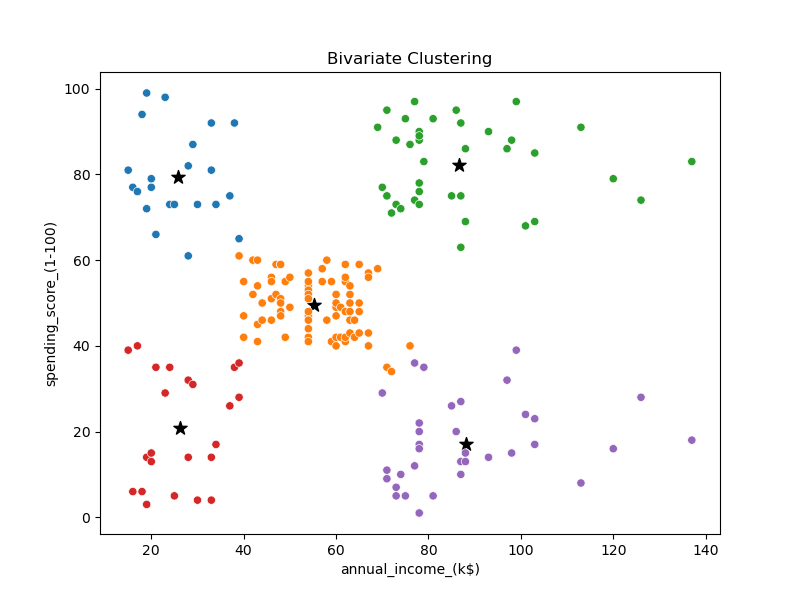

In [35]:
Image(filename='clustering_bivaraiate.png') 